
---

# 🎨 Diagram-Builder
**Diagram-Builder** is an approach that allows you to create diagrams through code instead of traditional graphic tools. Instead of manually building diagrams, you can write code in a text file to define the structure, components, and connections of your diagrams.  

This code is then translated into graphical images, making it easier to integrate and document in software projects, where it is especially useful for creating and updating architectural and flow diagrams programmatically.

---

# What is Diagrams?  
**Diagrams** is a **🐍Python library** that implements the Diagram as Code approach, enabling you to create architectural infrastructure diagrams and other types of diagrams through code. With Diagrams, you can easily define cloud infrastructure components (such as `AWS`, `Azure`, and `GCP`), network elements, software services, and more, all with just a few lines of code.

### 🎉 Benefits of Diagram-as-Code
* 📝 **Representation of Diagrams as Code**: Create and update diagrams directly from code, ensuring maintainability in agile projects.
* 📑 **Automated Documentation**: Generate visuals from code, keeping diagrams aligned with the current architecture.
* 🔄 **Change Control**: Track diagram modifications over time.
* 🔍 **Enhanced Clarity**: Improve understanding of complex systems with clear, shared visuals.
* ✏️ **Customizable**: Represent cloud infrastructures, workflows, or data pipelines with flexible and tailored visuals.

<br>

---

> To explore and view all the available documentation and functionality, you can check the documentation at the following link: [diagrams docs](https://diagrams.mingrammer.com/)


## 🐍 Library Installation  
We are currently using version `'0.23.4'`.

In [ ]:
#!pip uninstall diagrams
#!pip install diagrams=='0.23.4'


# 🎨 Diagrams: Nodes  
The library allows you to create architectural diagrams programmatically, using nodes to represent different infrastructure components and services.

---

## Node Types  
Nodes in Diagrams represent components from different cloud service providers as well as other architectural elements. Here are the main categories of available nodes:

* ☁️ **Cloud Providers**: AWS (Amazon Web Services), Azure, GCP, IBM Cloud, Alibaba Cloud, Oracle Cloud, DigitalOcean, among others.
* 🏢 **On-Premise**: Represents the infrastructure physically located on the company's premises.
* 🚢 **Kubernetes (K8S)**: Container orchestration system to automate the deployment, scaling, and management of containerized applications (represented by a ship's wheel, symbolizing control and navigation).
* 🖥️ **OpenStack**: Open-source software platform for creating and managing public and private clouds.
* 🔧 **Generic**: Generic nodes that can represent any component not specifically covered by provider-specific nodes (crossed tools, representing different tools in one category).
* ☁️ **SaaS (Software as a Service)**: Represents applications delivered as a service over the internet, such as Snowflake, chat services (Slack, Teams, Telegram, among others), security (e.g., Okta), or social networks (crossed out phone and cloud for the SaaS concept).
* 🔧 **Custom**: Allows users to customize their diagrams using PNG icons stored in a specific folder. This is useful for representing infrastructure components not covered by the default nodes (crossed-out custom tools).  


## 💻 Programming Languages  
The **Diagrams** library allows you to use different nodes to represent various programming languages. These nodes are helpful for indicating in your diagrams if any part of your architecture utilizes scripts or components developed in a specific programming language.

Below, we will showcase all the available languages in the library. If any language is missing, you can add custom nodes by uploading the corresponding logo into a specific folder.

In [ ]:
import diagrams
from IPython.display import Image

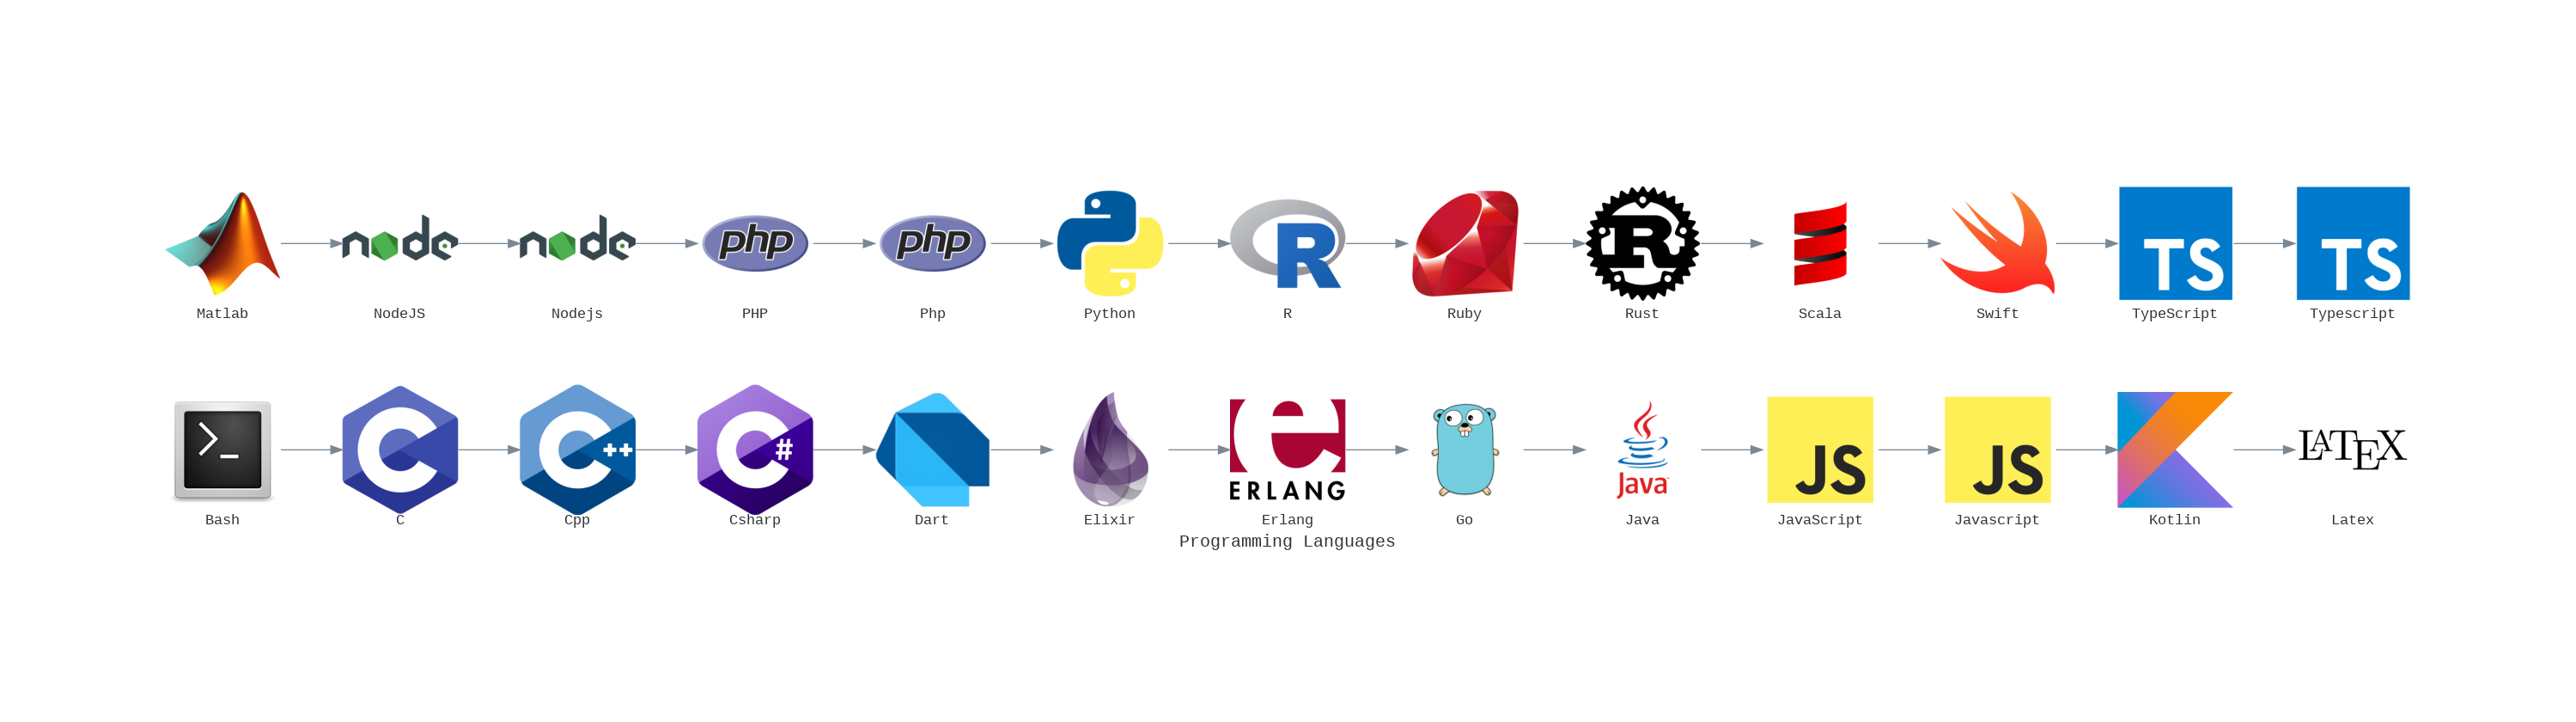

In [ ]:
# Create the diagram object
with diagrams.Diagram("Programming Languages", show=False, filename="languages"):
    # Get all the languages available in this library
    languages = [item for item in dir(diagrams.programming.language) if item[0] != '_']

    # Divide the representation in two lines
    mid_index = len(languages) // 2
    first_line = languages[:mid_index]
    second_line = languages[mid_index:]

    # Add nodes in the first row
    prev_node = None

    for language in first_line:
        current_node = eval(f"diagrams.programming.language.{language}(language)")
        if prev_node is not None:
            prev_node >> current_node
        prev_node = current_node

    # Add nodes in the second row
    prev_node = None

    for language in second_line:
        current_node = eval(f"diagrams.programming.language.{language}(language)")
        if prev_node is not None:
            prev_node >> current_node
        prev_node = current_node

Image("languages.png")



## ☁️ AWS (Amazon Web Services)  
We can use Amazon nodes, which are organized into several categories, such as:

* **Analytics and Business**: aws.analytics, aws.business  
* **Compute and Storage**: aws.compute, aws.storage, aws.cost  
* **Database and DevTools**: aws.database, aws.devtools  
* **Integration and Management**: aws.integration, aws.management  
* **Machine Learning and Mobile**: aws.ml, aws.mobile  
* **Networking and Security**: aws.network, aws.security  
* **Others**: aws.blockchain, aws.enduser, aws.engagement, aws.game, aws.general, aws.iot, aws.media, aws.migration, aws.quantum, aws.robotics, aws.satellite  

Next, we will represent one of these categories to visualize the available nodes within `aws.database`.

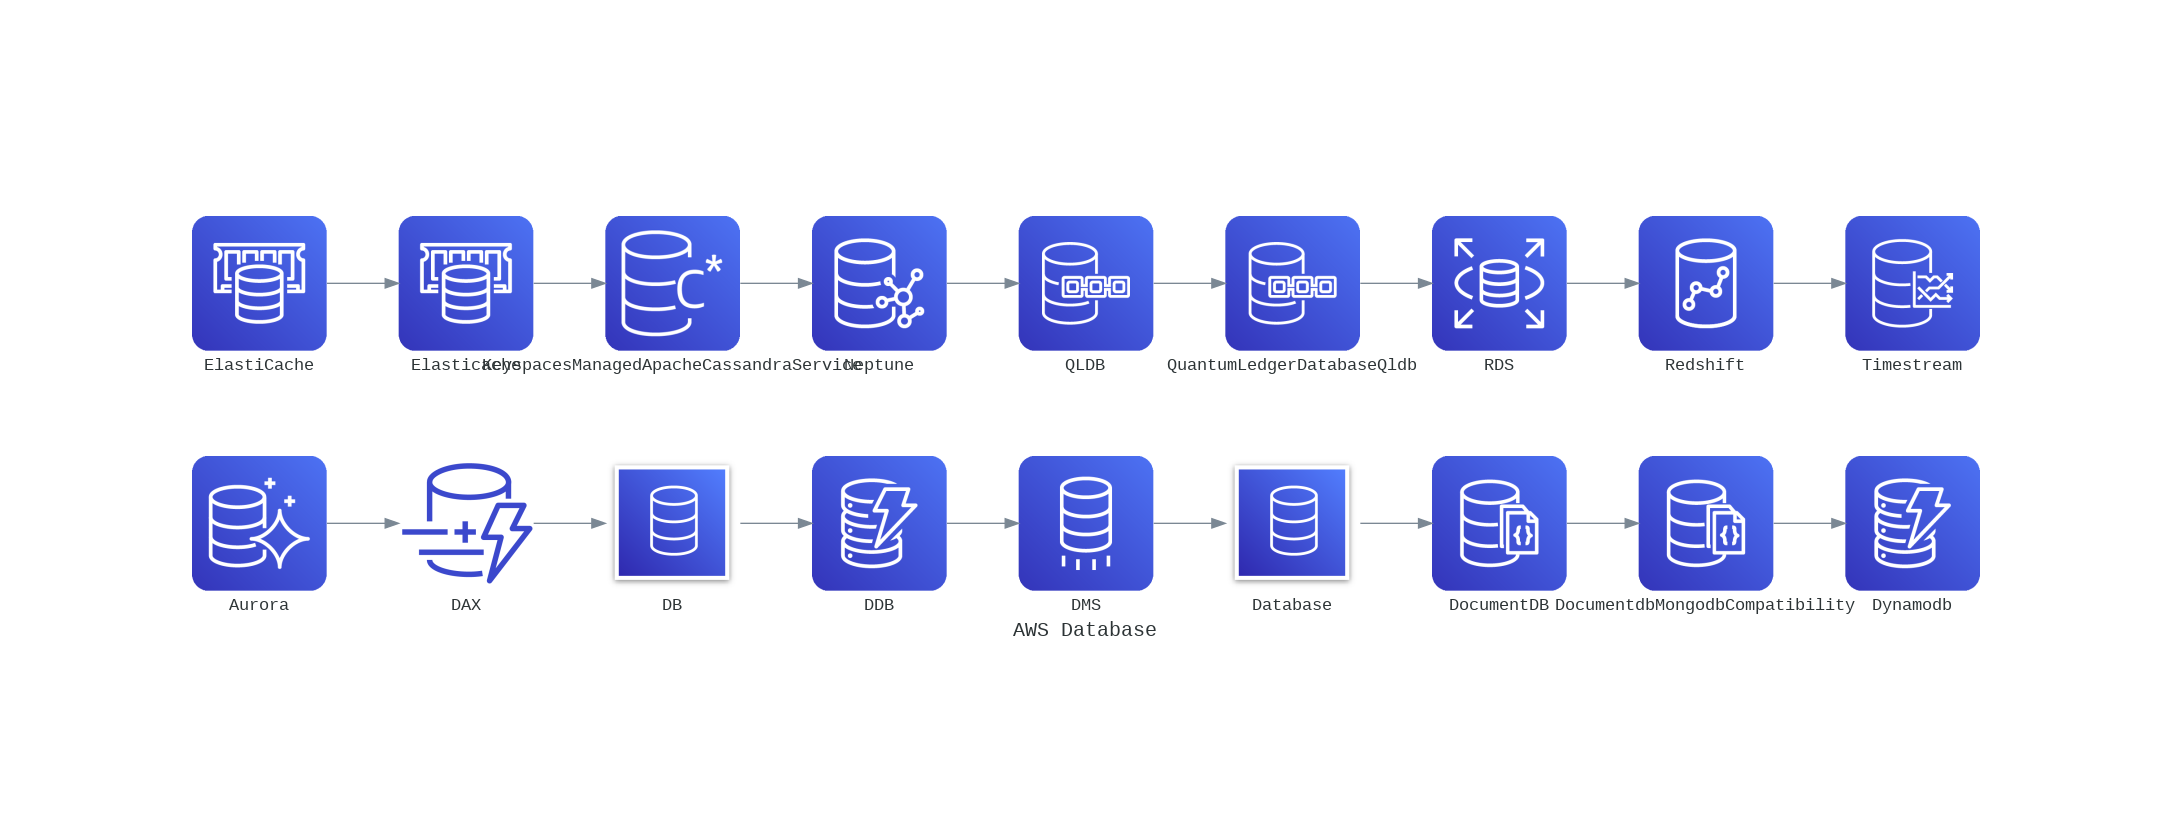

In [ ]:
from diagrams import Diagram
from IPython.display import Image
import diagrams.aws.database as aws_database


database_components = []
for item in dir(aws_database):
    if item[0] != '_':
        if not any(comp.startswith(item) or item.startswith(comp) for comp in database_components):
            database_components.append(item)


with Diagram("AWS Database", show=False, filename="aws_database"):
    mid_index = len(database_components) // 2
    first_line = database_components[:mid_index]
    second_line = database_components[mid_index:]


    prev_node = None
    for item_database in first_line:
        current_node = eval(f"aws_database.{item_database}(item_database)")
        if prev_node is not None:
            prev_node >> current_node
        prev_node = current_node


    prev_node = None
    for item_database in second_line:
        current_node = eval(f"aws_database.{item_database}(item_database)")
        if prev_node is not None:
            prev_node >> current_node
        prev_node = current_node

Image("aws_database.png")


## ☁️ Use Case  
Now, let's create a simple blueprint that corresponds to importing a dataset and training a machine learning model on **AWS**.

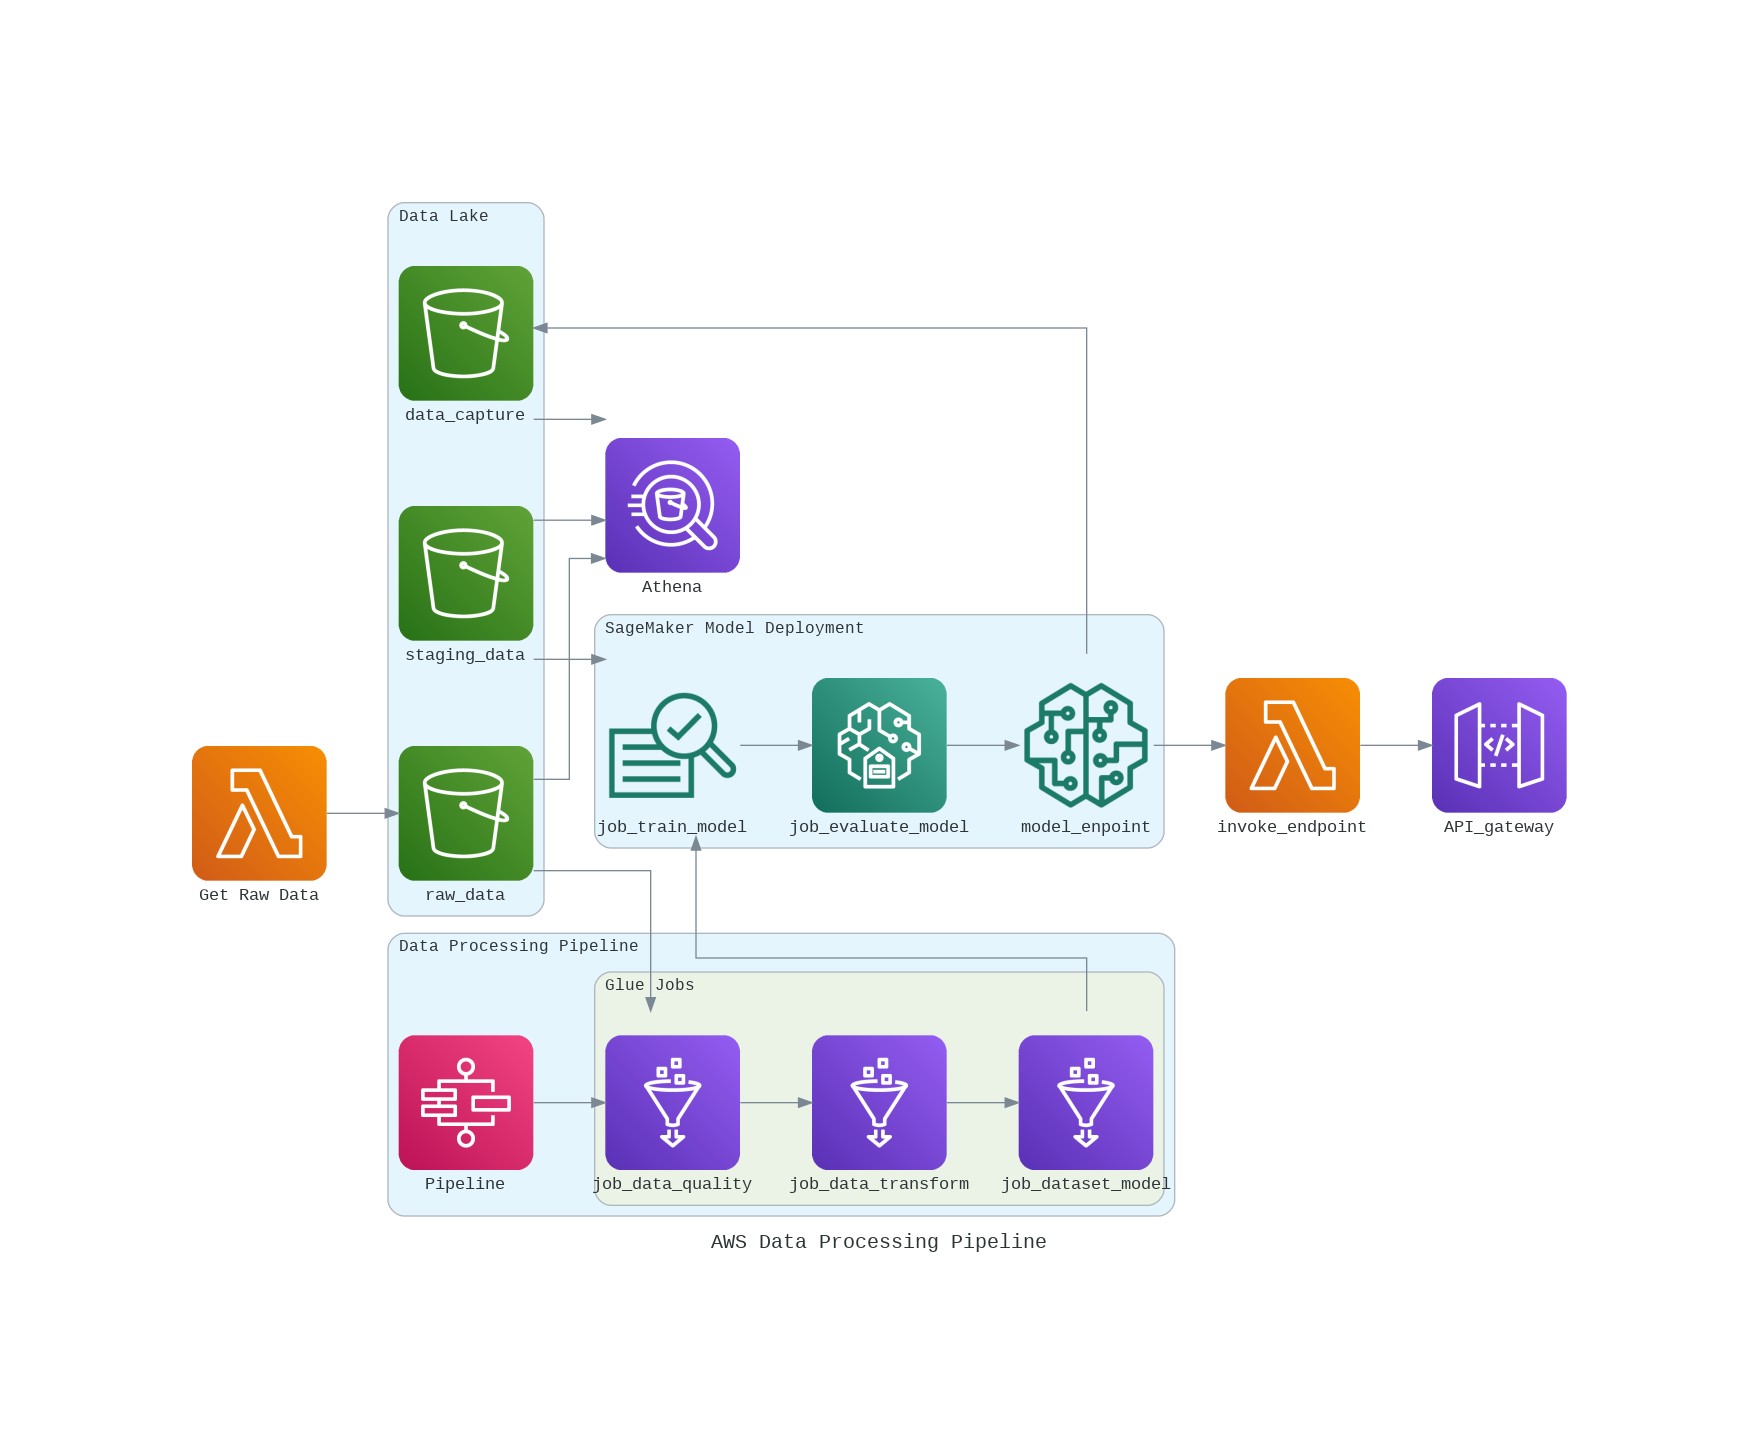

In [ ]:
from diagrams import Diagram, Cluster
from diagrams.aws.storage import S3
from diagrams.aws.analytics import Glue, Athena
import diagrams.aws.ml as ml
from diagrams.aws.integration import StepFunctions
from diagrams.aws.compute import Lambda
from diagrams.aws.network import APIGateway
from IPython.display import Image

with Diagram("AWS Data Processing Pipeline", show=False):

    lambda_raw = Lambda('Get Raw Data')
    # Buckets de S3
    with Cluster("Data Lake"):
        s3_rawData = S3("raw_data")
        s3_stage = S3("staging_data")
        s3_data_capture = S3("data_capture")


    athena = Athena("Athena")
    s3_rawData >> athena
    s3_stage >> athena
    s3_data_capture >> athena

    #  Step Functions Pipeline
    with Cluster("Data Processing Pipeline"):
        step_functions = StepFunctions("Pipeline")

        # Glue Jobs in Step Functions
        with Cluster("Glue Jobs"):
            data_quality = Glue("job_data_quality")
            transform = Glue("job_data_transform")
            dataset_preparation = Glue("job_dataset_model")

        # Define Step Functions Flows
        step_functions >> data_quality >> transform >> dataset_preparation
        s3_rawData >> data_quality

    # SageMaker for model training and deployment
    with Cluster("SageMaker Model Deployment"):
        train_model = ml.SagemakerTrainingJob("job_train_model")
        eval_model = ml.SagemakerGroundTruth("job_evaluate_model")
        endpoint = ml.SagemakerModel("model_enpoint")

    # API Gateway and Lambda for the endpoint
    api_gateway = APIGateway("API_gateway")
    lambda_fn = Lambda("invoke_endpoint")

    # Connection
    lambda_raw >> s3_rawData
    s3_stage >> train_model >> eval_model >> endpoint
    endpoint >> lambda_fn >> api_gateway
    endpoint >> s3_data_capture
    dataset_preparation >> train_model


Image("aws_data_processing_pipeline.png")
